## Installing Relevant Packages

In [1]:
!pip install python-docx wordcloud matplotlib tqdm numpy

## Imports

In [1]:
import docx
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tqdm import tqdm
import numpy as np

## Parsing the Doc

In [2]:
def read_docx_to_string(file_path):
    doc = docx.Document(file_path)
    
    # Read each paragraph and combine them into a single string
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    
    return '\n'.join(full_text)

file_path = "../../data/constitution_pdfs/constitution_english_reduced_delimited.docx"  # Replace with your .docx file path
docx_content = read_docx_to_string(file_path)


def extract_sections(text):
    # Use regex to find text between triple backticks
    sections = re.findall(r'```(.*?)```', text, re.DOTALL)
    return sections


sections = extract_sections(docx_content)
sections[:15]

['The Republic and its territories\n11.\t(1)\tPakistan shall be Federal Republic to be known as the Islamic Republic of Pakistan, hereinafter referred to as Pakistan.\n\n2[(2)\tThe territories of Pakistan shall comprise—\n\nthe\tProvinces\tof\t3[Balochistan],\tthe\t4[Khyber Pakhtunkhwa], the Punjab and 5[Sindh];\nthe Islamabad Capital Territory, hereinafter referred to as the Federal Capital; 6[and]\n6[(c)\t*\t*\t*\t*\t*\t*]\n\n6[(c)] such States and territories as are or may be included in Pakistan, whether by accession or otherwise.\n\n(3) 7[Majlis-e-Shoora (Parliament)] may by law admit into the Federation new States or areas on such terms and conditions as it thinks fit.]',
 'Islam to be State religion\n\nIslam shall be the State religion of Pakistan. ',
 'The   Objectives\tResolution   to   form\tpart\tof substantive provisions\n\n8[2A. The principles and provisions set out in the Objectives Resolution reproduced in the Annex are hereby made substantive part of the Constitution an

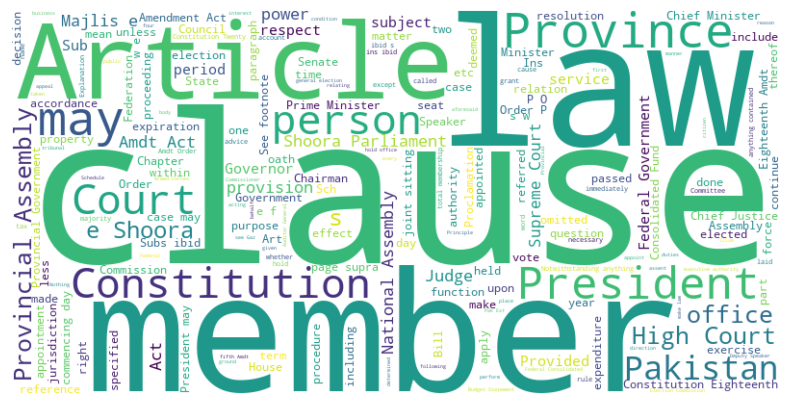

In [3]:
# Function to generate and display the word cloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud(docx_content)

Processing Sections: 100%|██████████| 312/312 [00:00<00:00, 24390.49it/s]


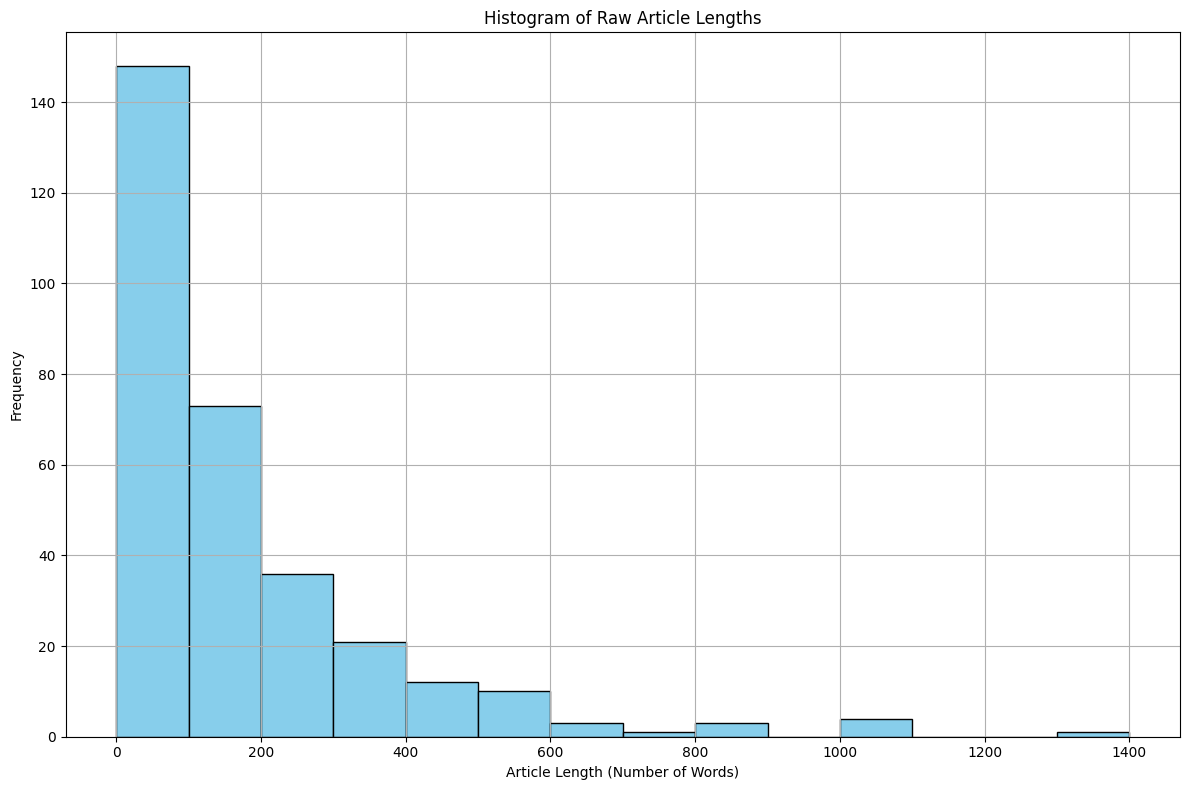

In [4]:
def word_count_distribution(sections):
    word_counts = []
    
    # Wrap the sections iterable with tqdm to display a progress bar
    for section in tqdm(sections, desc='Processing Sections'):
        # Tokenize words
        words = re.findall(r'\b\w+\b', section.lower())
        # Count total number of words
        total_word_count = len(words)
        word_counts.append(total_word_count)
    
    return word_counts

def plot_word_count_distribution(word_counts):
    # Plot histogram of word counts
    plt.figure(figsize=(12, 8))
    plt.hist(word_counts, bins=range(0, max(word_counts) + 100, 100), color='skyblue', edgecolor='black')
    plt.title('Histogram of Raw Article Lengths')
    plt.xlabel('Article Length (Number of Words)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

word_counts = word_count_distribution(sections)
plot_word_count_distribution(word_counts)

In [5]:
len(sections)

312

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Function to categorize sections based on word count
def categorize_sections(sections):
    # Step 1: Calculate word counts for each string
    word_counts = [len(section.split()) for section in sections]
    
    # Step 2: Determine the thresholds for small, medium, and large categories
    percentiles = np.percentile(word_counts, [25, 75])  # 25th and 75th percentile
    small_threshold, large_threshold = percentiles
    
    # Step 3: Categorize the sections
    categorized_sections = {'small': [], 'medium': [], 'large': []}
    
    for section, count in zip(sections, word_counts):
        if count <= small_threshold:
            categorized_sections['small'].append(section)
        elif count >= large_threshold:
            categorized_sections['large'].append(section)
        else:
            categorized_sections['medium'].append(section)
    
    return categorized_sections


# Function to plot a histogram of the word counts by category
def plot_histogram(categorized_sections):
    # Count the number of words in each section for each category
    small_word_counts = [len(section.split()) for section in categorized_sections['small']]
    medium_word_counts = [len(section.split()) for section in categorized_sections['medium']]
    large_word_counts = [len(section.split()) for section in categorized_sections['large']]
    
    # Plot a histogram for each category
    plt.figure(figsize=(20, 12))
    
    plt.hist(small_word_counts, bins=10, alpha=0.5, label='Small', color='blue')
    plt.hist(medium_word_counts, bins=10, alpha=0.5, label='Medium', color='green')
    plt.hist(large_word_counts, bins=10, alpha=0.5, label='Large', color='red')
    
    # Adjust font sizes
    plt.xlabel('Word Count', fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    plt.title('Word Count Distribution by Category', fontsize=24)
    plt.legend(fontsize=16)
    
    plt.show()

# Function to calculate statistics for each category
def calculate_statistics(categorized_sections):
    stats = {}
    for category, sections in categorized_sections.items():
        word_counts = [len(section.split()) for section in sections]
        num_points = len(word_counts)
        mean_count = np.mean(word_counts) if num_points > 0 else 0
        std_dev = np.std(word_counts) if num_points > 0 else 0
        word_range = (min(word_counts), max(word_counts)) if num_points > 0 else (0, 0)
        
        stats[category] = {
            'Number of Data Points': num_points,
            'Mean Word Count': mean_count,
            'Standard Deviation': std_dev,
            'Range of Word Count': word_range
        }
    return stats


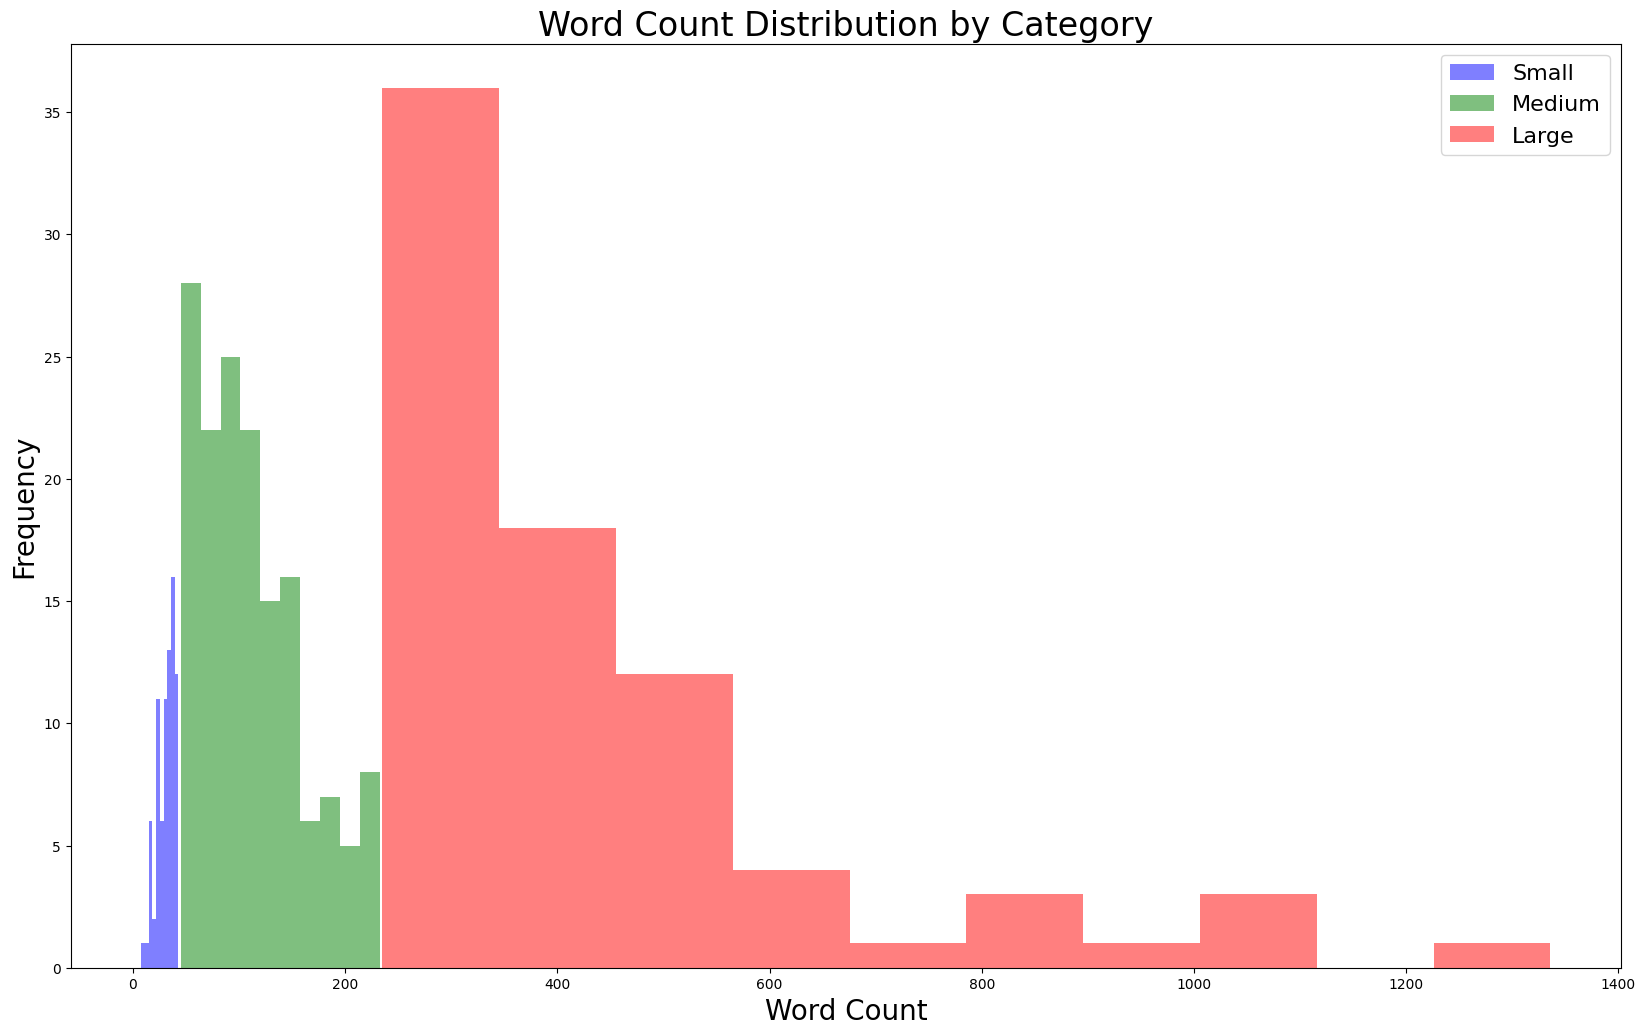

{'small': {'Number of Data Points': 79,
  'Mean Word Count': 31.050632911392405,
  'Standard Deviation': 8.213756189385201,
  'Range of Word Count': (8, 43)},
 'medium': {'Number of Data Points': 154,
  'Mean Word Count': 112.3961038961039,
  'Standard Deviation': 49.11124647445756,
  'Range of Word Count': (45, 233)},
 'large': {'Number of Data Points': 79,
  'Mean Word Count': 438.6835443037975,
  'Standard Deviation': 224.87349716943095,
  'Range of Word Count': (235, 1336)}}

In [19]:
# Categorize the sections
categorized_sections = categorize_sections(sections)

# Plot the histogram
plot_histogram(categorized_sections)

# Calculate statistics for each category
stats = calculate_statistics(categorized_sections)
display(stats)

## Applying log transformation to deal with skewed data

In [6]:
word_counts = np.array(word_counts)
# add 1 to avoid log(0)
log_article_lengths = np.log(np.array(word_counts) + 1)

# calculate 25th and 75th percentiles
log_q25 = np.percentile(log_article_lengths, 25)
log_q75 = np.percentile(log_article_lengths, 75)

def categorize_article(length):
    log_length = np.log(length + 1)
    if log_length < log_q25:
        return 'Small'
    elif log_length <= log_q75:
        return 'Medium'
    else:
        return 'Large'

categorized_articles = [(article, categorize_article(len(article.split()))) for article in sections]
categorized_articles[0]

('The Republic and its territories\n11.\t(1)\tPakistan shall be Federal Republic to be known as the Islamic Republic of Pakistan, hereinafter referred to as Pakistan.\n\n2[(2)\tThe territories of Pakistan shall comprise—\n\nthe\tProvinces\tof\t3[Balochistan],\tthe\t4[Khyber Pakhtunkhwa], the Punjab and 5[Sindh];\nthe Islamabad Capital Territory, hereinafter referred to as the Federal Capital; 6[and]\n6[(c)\t*\t*\t*\t*\t*\t*]\n\n6[(c)] such States and territories as are or may be included in Pakistan, whether by accession or otherwise.\n\n(3) 7[Majlis-e-Shoora (Parliament)] may by law admit into the Federation new States or areas on such terms and conditions as it thinks fit.]',
 'Medium')

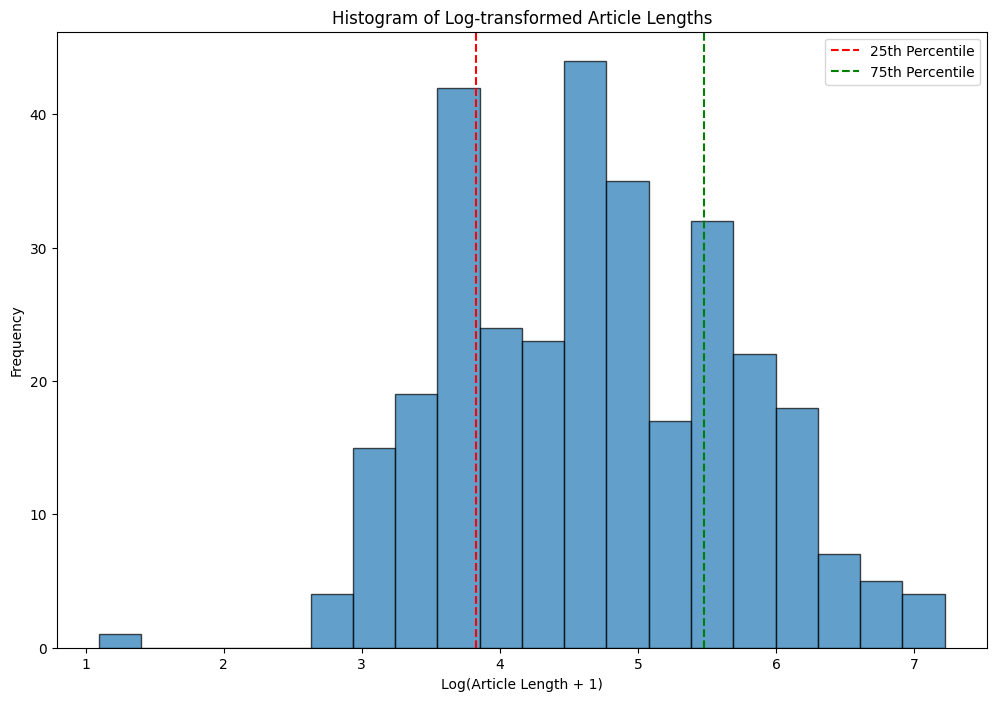

In [11]:
plt.figure(figsize=(12, 8))
# histogram of the log-transformed data
plt.hist(log_article_lengths, bins=20, edgecolor='black', alpha=0.7)

plt.axvline(log_q25, color='r', linestyle='--', label='25th Percentile')
plt.axvline(log_q75, color='g', linestyle='--', label='75th Percentile')

plt.xlabel('Log(Article Length + 1)')
plt.ylabel('Frequency')
plt.title('Histogram of Log-transformed Article Lengths')
plt.legend()

plt.show()

## Saving Raw English Chunks (Article Level Chunking)

In [9]:
import pickle

with open('../../data/document_chunks/article_wise_chunks_raw_english.pkl', 'wb') as file:
    pickle.dump(sections, file)

with open('../../data/document_chunks/article_wise_chunks_categorized_english.pkl', 'wb') as file:
    pickle.dump(categorized_articles, file)